BASADO EN : Clustering con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py20-clustering-con-python.html

# Cálculo de Distancias

El set de datos **USArrests** contiene el porcentaje de asaltos (Assault), asesinatos (Murder) y secuestros (Rape) por cada 100,000 habitantes para cada uno de los 50 estados de USA (1973). Además, también incluye el porcentaje de la población de cada estado que vive en zonas rurales (UrbanPoP). Empleando estas variables, se pretende calcular una matriz de distancias que permita identificar los estados más similares.

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
datos.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
# Se crea primero el objeto Standard Scaler
scaler = StandardScaler()

# Luego "entrenamos" con los datos para obtener los parámetros del escalamiento
scaler.fit(df)

# Finalmente aplicamos el escalamiento
array_scaler = scaler.transform(df)

NameError: ignored

In [ ]:
# Escalado de las variables
# ==============================================================================
datos_scaled = scale(X=datos, axis=0, with_mean=True, with_std=True)
datos_scaled = pd.DataFrame(datos_scaled, columns=datos.columns, index=datos.index)
datos_scaled.head(60)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814
Colorado,0.025976,0.402909,0.869548,1.883901
Connecticut,-1.040880,-0.736484,0.799761,-1.092723
Delaware,-0.437875,0.815030,0.450825,-0.585834
Florida,1.765415,1.990786,1.009122,1.150530


In [ ]:
datos_scaled.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-7.105427e-17,1.387779e-16,-4.396483e-16,8.593126e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


In [ ]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia euclídea')
print('------------------')
distancias = pairwise_distances(
                X      = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.iloc[:4,:4]

------------------
Distancia euclídea
------------------


rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,2.731204,NaN,NaN,NaN
Arizona,2.316805,2.728061,NaN,NaN
Arkansas,1.302905,2.854730,2.74535,NaN


In [ ]:
# Top n observaciones más similares
# ==============================================================================
distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .head(3)

,estado_a,estado_b,distancia
728,New Hampshire,Iowa,0.207944
631,New York,Illinois,0.353774
665,Kansas,Indiana,0.433124


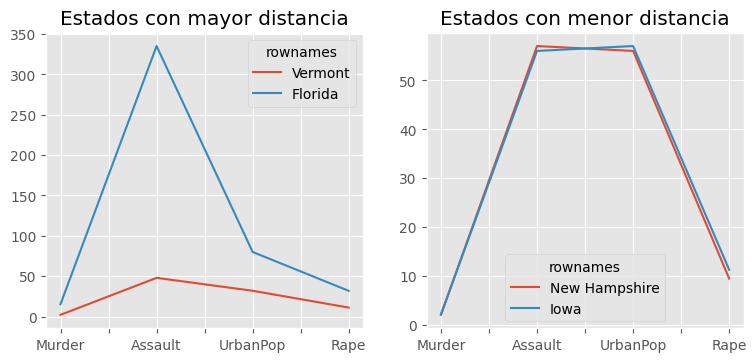

In [ ]:
# Estados con mayor y menor distancia
# ==============================================================================
fig, axs = plt.subplots(1,2, figsize=(9, 3.84))
datos.loc[['Vermont', 'Florida']].transpose().plot(ax= axs[0])
axs[0].set_title('Estados con mayor distancia')
datos.loc[['New Hampshire', 'Iowa']].transpose().plot(ax= axs[1])
axs[1].set_title('Estados con menor distancia');

# EJERCICIO

Dos de las librerías de python que implementan las distancias  (junto con otras) son **sklearn.metrics.pairwise_distances** y **scipy.spatial.distance**.

En concreto, **sklearn** permite calcular las distancias: ‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’, ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’ y ‘yule’.

A partir de los datos de **USArrests** y tomando como guía el ejemplo anterior, calcule a lo menos 4 distancias con distintos métodos y grafique las respectivas similaridades.

In [ ]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia Manhattan')
print('------------------')
distancias_manhattan = pairwise_distances(
                X      = datos_scaled,
                metric ='manhattan'
             )

# Se descarta la diagonal superior de la matriz
distancias_manhattan[np.triu_indices(n=distancias_manhattan.shape[0])] = np.nan

distancias_manhattan = pd.DataFrame(
                distancias_manhattan,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias_manhattan.iloc[:4,:4]

------------------
Distancia Manhattan
------------------


rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,4.280180,NaN,NaN,NaN
Arizona,4.478083,4.505562,NaN,NaN
Arkansas,2.319686,3.998950,4.756827,NaN


In [ ]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia cosine')
print('------------------')
distancias_cosine = pairwise_distances(
                X      = datos_scaled,
                metric ='cosine'
             )

# Se descarta la diagonal superior de la matriz
distancias_cosine[np.triu_indices(n=distancias_cosine.shape[0])] = np.nan

distancias_cosine = pd.DataFrame(
                distancias_cosine,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias_cosine.iloc[:4,:4]

------------------
Distancia cosine
------------------


rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,0.549507,NaN,NaN,NaN
Arizona,0.775744,0.511214,NaN,NaN
Arkansas,0.419331,0.646351,1.385628,NaN


In [ ]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia cityblock')
print('------------------')
distancias_cityblock = pairwise_distances(
                X      = datos_scaled,
                metric ='cityblock'
             )

# Se descarta la diagonal superior de la matriz
distancias_cityblock[np.triu_indices(n=distancias_cityblock.shape[0])] = np.nan

distancias_cityblock = pd.DataFrame(
                distancias_cityblock,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias_cityblock.iloc[:4,:4]

------------------
Distancia cityblock
------------------


rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,4.280180,NaN,NaN,NaN
Arizona,4.478083,4.505562,NaN,NaN
Arkansas,2.319686,3.998950,4.756827,NaN
